In [1]:
import os
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from matplotlib.cbook import flatten

import numpy as np
import tensorflow as tf

In [2]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

In [3]:
train_dir = 'C:/aiproject/aireport/moutainsea/train'
test_dir = 'C:/aiproject/aireport/moutainsea/test'

train_city_dir = 'C:/aiproject/aireport/moutainsea/train/city'
train_forest_dir = 'C:/aiproject/aireport/moutainsea/train/forest'
train_mountain_dir = 'C:/aiproject/aireport/moutainsea/train/mountain'
train_sea_dir = 'C:/aiproject/aireport/moutainsea/train/sea'


test_city_dir = 'C:/aiproject/aireport/moutainsea/test/city'
test_forest_dir = 'C:/aiproject/aireport/moutainsea/test/forest'
test_mountain_dir = 'C:/aiproject/aireport/moutainsea/test/mountain'
test_sea_dir = 'C:/aiproject/aireport/moutainsea/test/sea'


In [4]:
print("훈련 도시데이터 수 : {}".format(len(os.listdir(train_city_dir))))
print("훈련 숲 데이터 수 : {}".format(len(os.listdir(train_forest_dir))))
print("훈련 산 데이터 수 : {}".format(len(os.listdir(train_mountain_dir))))
print("훈련 바다 데이터 수 : {}".format(len(os.listdir(train_sea_dir))))

print("테스트 도시데이터 수 : {}".format(len(os.listdir(test_city_dir))))
print("테스트 숲 데이터 수 : {}".format(len(os.listdir(test_forest_dir))))
print("테스트 산 데이터 수 : {}".format(len(os.listdir(test_mountain_dir))))
print("테스트 바다 데이터 수 : {}".format(len(os.listdir(test_sea_dir))))




훈련 도시데이터 수 : 5511
훈련 숲 데이터 수 : 2745
훈련 산 데이터 수 : 5993
훈련 바다 데이터 수 : 2777
테스트 도시데이터 수 : 938
테스트 숲 데이터 수 : 474
테스트 산 데이터 수 : 1078
테스트 바다 데이터 수 : 510


In [5]:
train_gen = ImageDataGenerator( rescale = 1./255)
test_gen = ImageDataGenerator( rescale = 1./255)

In [6]:

train_generator = train_gen.flow_from_directory(train_dir,
                              target_size =(64,64),
                              batch_size=32,
                              class_mode = 'categorical')

test_generator = test_gen.flow_from_directory( test_dir,
                            target_size = (64,64),
                            batch_size=32,
                            class_mode =  'categorical')

Found 17026 images belonging to 4 classes.
Found 3000 images belonging to 4 classes.


In [7]:
c_model = Sequential()

kernelsize = 3


# 입력층(CNN)
# 특징을 도드라지게 해준다
c_model.add(Conv2D(filters = 32, 
                   kernel_size = kernelsize, 
                   input_shape = (64,64,3), 
                   padding = 'same', 
                   activation = 'relu'))

c_model.add(Conv2D(filters = 64,
                   kernel_size = kernelsize, 
                   input_shape = (64,64,3), 
                   padding = 'same', 
                   activation = 'relu'))
#불필요한 부분 삭제
c_model.add(MaxPooling2D(pool_size = (2,2),strides=2))

c_model.add(Dropout(0.25))

# 1차원으로 데이터 축소
c_model.add(Flatten())

#은닉층
c_model.add(Dense(units=20, activation = 'relu'))

c_model.add(Dropout(0.5))
#출력층
c_model.add(Dense(units=4, activation= 'softmax'))

c_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 64)        0         
                                                                 
 flatten (Flatten)           (None, 65536)             0         
                                                                 
 dense (Dense)               (None, 20)                1310740   
                                                        

In [8]:
adam = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
c_model.compile(loss='categorical_crossentropy',
                optimizer = adam,
                metrics=['accuracy'])

In [9]:
c_history = c_model.fit_generator(train_generator,
            steps_per_epoch=100,
            epochs=100,
            validation_data = test_generator,
            validation_steps = 5)

Epoch 1/100


C:\Users\k2h2j3\AppData\Local\Temp/ipykernel_10372/1457337949.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  c_history = c_model.fit_generator(train_generator,


100/100 [==============================] - 16s 159ms/step - loss: 1.2444 - accuracy: 0.4594 - val_loss: 1.0020 - val_accuracy: 0.5938
Epoch 2/100
100/100 [==============================] - 18s 175ms/step - loss: 1.0783 - accuracy: 0.5511 - val_loss: 0.8004 - val_accuracy: 0.6938
Epoch 3/100
100/100 [==============================] - 18s 175ms/step - loss: 0.9928 - accuracy: 0.6069 - val_loss: 0.7674 - val_accuracy: 0.7375
Epoch 4/100
100/100 [==============================] - 18s 176ms/step - loss: 0.9358 - accuracy: 0.6453 - val_loss: 0.6841 - val_accuracy: 0.7625
Epoch 5/100
100/100 [==============================] - 18s 178ms/step - loss: 0.9308 - accuracy: 0.6334 - val_loss: 0.7685 - val_accuracy: 0.6687
Epoch 6/100
100/100 [==============================] - 19s 186ms/step - loss: 0.9076 - accuracy: 0.6409 - val_loss: 0.8355 - val_accuracy: 0.6500
Epoch 7/100
100/100 [==============================] - 18s 176ms/step - loss: 0.8889 - accuracy: 0.6544 - val_loss: 0.7180 - val_accurac

Epoch 57/100
100/100 [==============================] - 18s 175ms/step - loss: 0.5798 - accuracy: 0.7800 - val_loss: 0.3547 - val_accuracy: 0.8500
Epoch 58/100
100/100 [==============================] - 18s 176ms/step - loss: 0.5596 - accuracy: 0.7806 - val_loss: 0.4234 - val_accuracy: 0.8875
Epoch 59/100
100/100 [==============================] - 18s 178ms/step - loss: 0.5983 - accuracy: 0.7590 - val_loss: 0.3965 - val_accuracy: 0.8500
Epoch 60/100
100/100 [==============================] - 18s 176ms/step - loss: 0.5740 - accuracy: 0.7770 - val_loss: 0.3579 - val_accuracy: 0.8500
Epoch 61/100
100/100 [==============================] - 18s 175ms/step - loss: 0.5883 - accuracy: 0.7732 - val_loss: 0.3981 - val_accuracy: 0.9125
Epoch 62/100
100/100 [==============================] - 18s 176ms/step - loss: 0.5501 - accuracy: 0.7919 - val_loss: 0.3308 - val_accuracy: 0.8438
Epoch 63/100
100/100 [==============================] - 18s 175ms/step - loss: 0.5666 - accuracy: 0.7828 - val_loss: 0

[]

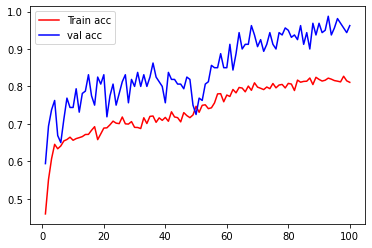

In [10]:
import matplotlib.pyplot as plt
acc = c_history.history['accuracy']
val_acc = c_history.history['val_accuracy']

epoch = range(1, len(acc)+1) #정확도의 개수

plt.plot(epoch, acc, c='red', label = 'Train acc') # 훈련 데이터 정확도
plt.plot(epoch, val_acc, c= 'blue', label = 'val acc') # 검증 데이터 정확도
plt.legend() #범례
plt.plot()

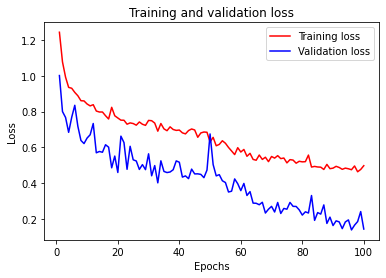

In [11]:
loss = c_history.history['loss']
val_loss = c_history.history['val_loss']

plt.plot(epoch, loss, 'red', label='Training loss')
plt.plot(epoch, val_loss, 'blue', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [12]:
from IPython.display import Image
from matplotlib.image import imread

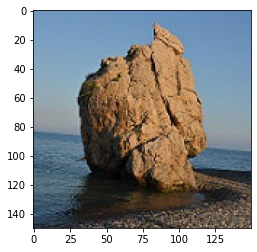

In [38]:
img = imread("C:/aiproject/pred/685.jpg")
plt.imshow(img)

In [39]:
from skimage.transform import resize
resizeimg = resize(img,(64,64,3))

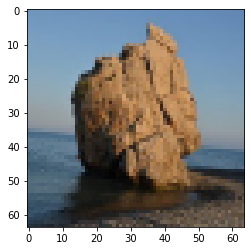

In [40]:
plt.imshow(resizeimg)

In [41]:
predictions = c_model.predict(np.array([resizeimg]))

predictions

array([[0.14427981, 0.00318161, 0.01095803, 0.8415806 ]], dtype=float32)

In [42]:
result = np.argmax(predictions[0])
if result == 0:
    print("도시")
elif result == 1:
    print("숲")
elif result == 2:
    print("산")
else:
    print("바다")

바다
